# PPO in Mountain Car Environment

In [1]:
import gymnasium as gym
import torch.nn as nn

from rlforge.agents.policy_gradient import PPOContinuous
from rlforge.experiments import ExperimentRunner

In [2]:
num_envs = 8
envs = gym.make_vec("Pendulum-v1", num_envs=num_envs, vectorization_mode="async")

agent = PPOContinuous(
    state_dim=envs.observation_space.shape[1],
    action_dim=envs.action_space.shape[1],
    network_architecture=[64,64],
    actor_lr=0.0003,
    critic_lr=0.003,
    discount=0.99,            # γ
    gae_lambda=0.95,          # λ for GAE
    clip_epsilon=0.5,
    update_epochs=10,
    mini_batch_size=256,
    rollout_length=4096,
    value_coef=0.5,
    entropy_coeff=0.0,
    max_grad_norm=0.5,
    tanh_squash=True,         # if True: tanh on actions; pass bounds
    action_low=envs.action_space.low[0],           # tensor or float, used if tanh_squash=False
    action_high=envs.action_space.high[0],          # tensor or float, used if tanh_squash=False
    device='cpu'
)

In [3]:
runner = ExperimentRunner(envs, agent)

results = runner.run_episodic_batch(
    num_runs=5,
    num_episodes=1500,
    max_steps_per_episode=None
)

rewards = results["rewards"]

runner.summary(last_n=20)

 Experiment Summary (Episodic)
Runs: 5
Average runtime per run: 77.259 seconds
Episodes per run (Max): 1500
First episode mean reward: -1463.929
Last episode mean reward: -406.694
Overall mean reward: -793.919
Mean reward (last 20 episodes): -490.326
First episode mean steps: 200.0
Last episode mean steps: 201.0
Overall mean steps: 201.0


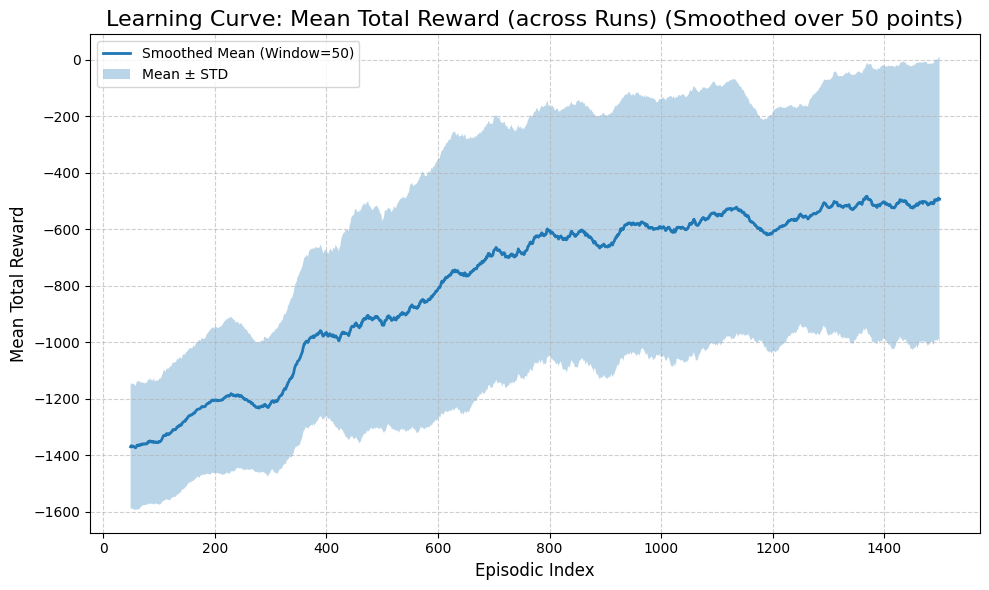

In [5]:
runner.plot_results()